## Chapter7.6 TensorFlowの準備

In [1]:
# パッケージの読み込み
import tensorflow as tf

tf.__version__

'1.0.0'

足し算を実行

In [2]:
with tf.Graph().as_default():
    # 定数の定義
    x = tf.constant(10, name="x")
    y = tf.constant(32, name="y")

    # 足し算
    op = tf.add(x, y)

    # 演算を実行
    with tf.Session() as sess:
        result = sess.run(op)

print(result)  # -> 42

42


変数とプレースホルダ

In [3]:
with tf.Graph().as_default():
    # xは入力を受け付ける入れ物
    x = tf.placeholder(tf.int32, name="x")
    y = tf.constant(32, name="y")

    # 足し算
    op1 = tf.add(x, y)

    # 足し算結果を格納する変数
    z = tf.Variable(0, name="z")

    # 足し算結果を変数に代入
    op2 = tf.assign(z, op1)

    # 変数の初期化
    init_op = tf.global_variables_initializer()

    # 演算を実行
    with tf.Session() as sess:
        # 変数の初期化を実行
        sess.run(init_op)
        # xに10をfeed_dictで入力し、結果を得る
        result = sess.run(op2, feed_dict={x: 10})

print(result)  # -> 42

42


ロジスティック回帰

データセットを作成

In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X_dataset, y_dataset = make_blobs(centers=[[-0.3, 0.5], [0.3, -0.2]],
                                  cluster_std=0.2,
                                  n_samples=100,
                                  center_box=(-1.0, 1.0),
                                  random_state=42)
y_dataset = y_dataset.reshape(-1, 1)

dataset = pd.DataFrame(X_dataset, columns=['x0', 'x1'])
dataset['y'] = y_dataset

プロット用関数を定義

In [5]:
def plot_dataset(dataset):
    fig, ax = plt.subplots()
    ax.tick_params(direction='in')
    for key, g in dataset.groupby('y'):
        color = 'k' if key == 1 else 'w'
        g.plot(ax=ax, kind='scatter', x='x0', y='x1',
               label=key, color=color, s=40,
               edgecolor='black', linewidth='1',
               xticks=np.arange(-1, 1, 0.5), yticks=np.arange(-1, 1, 0.5),
               xlim=(-1, 1), ylim=(-1, 1), figsize=(5, 5))
        plt.grid(which='major', color='grey', linestyle='--')
    return fig, ax


def plot_boundary(w, b):
    x = np.arange(-1, 1, 0.1)
    y = eval('%f*x + %f' % ((-w[0] / (w[1] + 1e-6)), (-b / (w[1] + 1e-6))))
    plt.plot(x, y, color='b', linewidth=2)

TensorFlowでロジスティック回帰

(0.72407717, array([[ 0.03871037],
       [-0.04589954]], dtype=float32), array([-0.03061483], dtype=float32))
(0.57749766, array([[ 2.42943335],
       [-2.58021379]], dtype=float32), array([-0.10247607], dtype=float32))
(0.54964095, array([[ 3.59925342],
       [-3.69231558]], dtype=float32), array([ 0.19453107], dtype=float32))
(0.5382728, array([[ 4.37750673],
       [-4.39150095]], dtype=float32), array([ 0.35291547], dtype=float32))


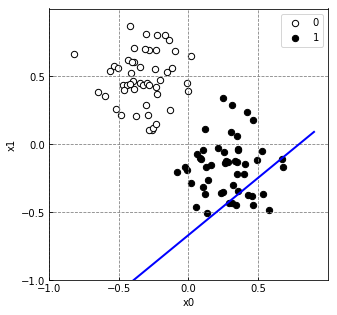

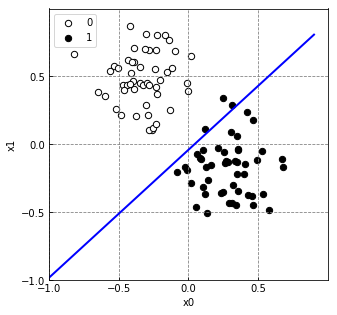

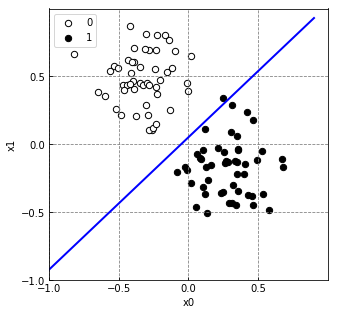

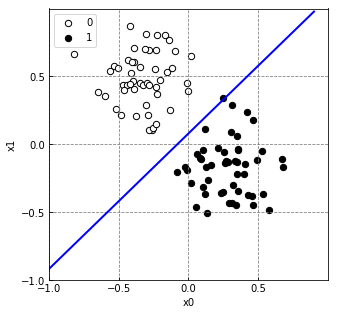

In [6]:

with tf.Graph().as_default():
    # 特徴量とラベルの入力
    x = tf.placeholder(tf.float32, shape=[None, 2], name="x")
    y = tf.placeholder(tf.float32, shape=[None, 1], name="y")

    # 重みとバイアスを変数で定義
    w = tf.Variable(tf.zeros([2, 1]), name="w")
    b = tf.Variable(tf.zeros([1]), name="b")

    # 識別境界からの距離
    score = tf.sigmoid(tf.matmul(x, w) + b)

    # 損失
    loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=score, labels=y))

    # 最急降下法で損失を最小化する
    train_step = tf.train.GradientDescentOptimizer(1.0).minimize(loss)
    # train_step = tf.train.AdamOptimizer(1.0).minimize(loss)

    # 変数の初期化
    init_op = tf.global_variables_initializer()

    # 演算を実行
    cnt = 0
    with tf.Session() as sess:
        # 変数の初期化を実行
        sess.run(init_op)

        # 400回学習させる
        for i in range(400):
            _, _l, _w, _b = sess.run([train_step, loss, w, b], feed_dict={x: X_dataset,
                                                                          y: y_dataset})
            # 100回に1回printする
            if i % 100 == 0:
                print(_l, _w, _b)
                plot_dataset(dataset)
                plot_boundary(_w, _b)
                cnt += 1